In [1]:
!pip install PyTDC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 45.5 MB/s eta 0:0

In [2]:
import pandas as pd
import numpy as np
from tdc.single_pred import Tox


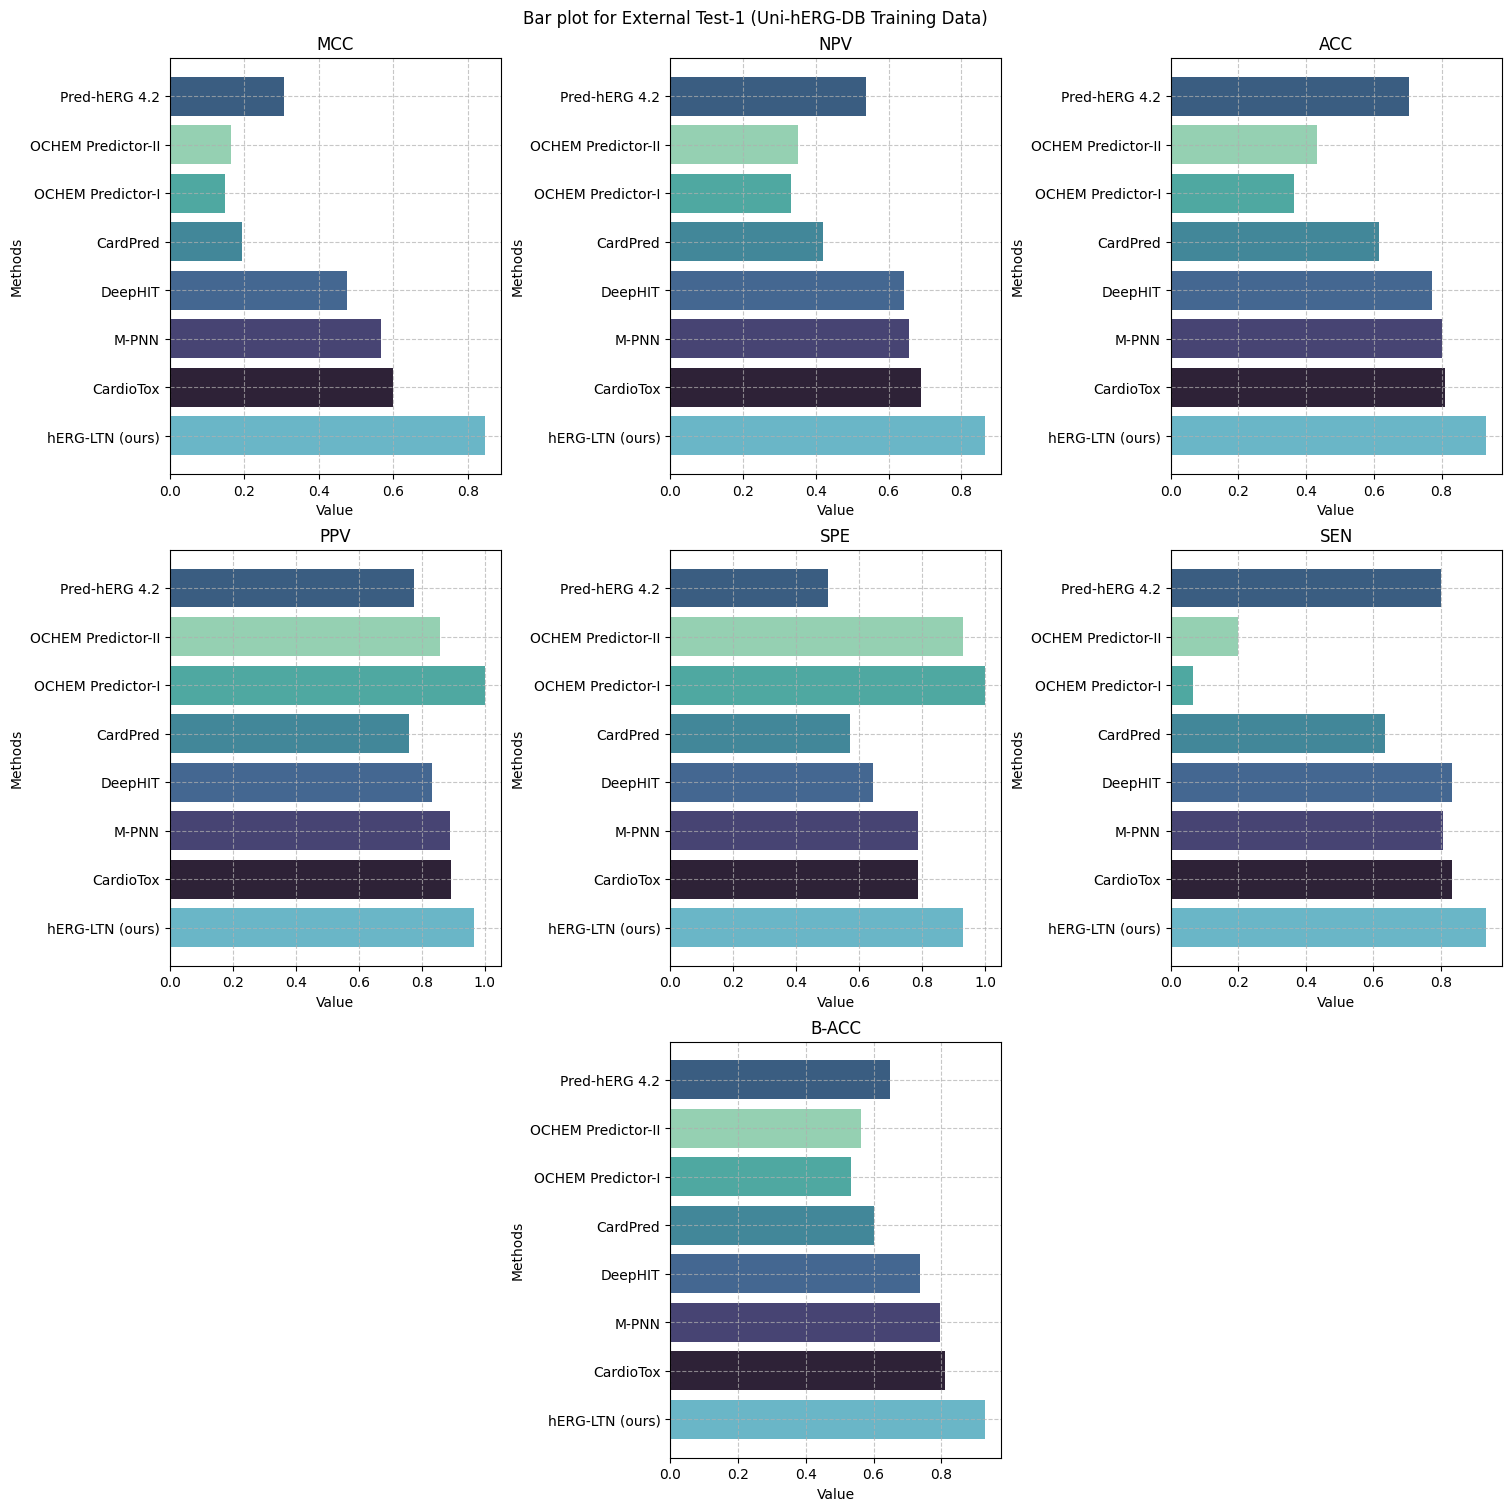

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for each method and metric
data = {
    "Methods": [
        "hERG-LTN (ours)", "CardioTox", "M-PNN", "DeepHIT", "CardPred",
        "OCHEM Predictor-I", "OCHEM Predictor-II", "Pred-hERG 4.2"
    ],
    "MCC": [0.846, 0.599, 0.567, 0.476, 0.193, 0.149, 0.164, 0.306],
    "NPV": [0.866, 0.688, 0.656, 0.643, 0.421, 0.333, 0.351, 0.538],
    "ACC": [0.931, 0.810, 0.800, 0.773, 0.614, 0.364, 0.432, 0.705],
    "PPV": [0.965, 0.893, 0.890, 0.833, 0.760, 1.000, 0.857, 0.774],
    "SPE": [0.928, 0.786, 0.786, 0.643, 0.571, 1.000, 0.929, 0.500],
    "SEN": [0.933, 0.833, 0.807, 0.833, 0.633, 0.067, 0.200, 0.800],
    "B-ACC": [0.930, 0.810, 0.796, 0.738, 0.602, 0.534, 0.564, 0.650],
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Set 'Methods' as the index
df.set_index('Methods', inplace=True)

# Define colors for each method
colors = {
    "CardioTox": '#2e2237',  # Dark purple
    "M-PNN": '#474473',      # Slate blue
    "DeepHIT": '#446791',    # Steel blue
    "CardPred": '#428799',   # Dark cyan
    "OCHEM Predictor-I": '#4fa8a1',  # Medium turquoise
    "OCHEM Predictor-II": '#95d0b2', # Light sea green
    "Pred-hERG 4.2": '#3a5d81',  # Slightly different blue
    "hERG-LTN (ours)": '#6ab6c7'        # Light turquoise
}

# Create subplots (3x3 grid)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), constrained_layout=True)

# Define positions for each metric
positions = {
    "MCC": (0, 0),
    "NPV": (0, 1),
    "ACC": (0, 2),
    "PPV": (1, 0),
    "SPE": (1, 1),
    "SEN": (1, 2),
    "B-ACC": (2, 1)  # Place B-ACC in 3rd row, 2nd column
}

# Plot each metric in its subplot
for metric, pos in positions.items():
    ax = axs[pos[0], pos[1]]
    # Use the color dictionary for each method
    bar_colors = [colors[method] for method in df.index]
    ax.barh(df.index, df[metric], color=bar_colors)
    ax.set_title(f'{metric}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Methods')
    ax.grid(True, linestyle='--', alpha=0.7)

# Hide empty subplots (3rd row, 1st and 3rd columns)
axs[2, 0].axis('off')
axs[2, 2].axis('off')
plt.suptitle("Bar plot for External Test-1 (Uni-hERG-DB Training Data)")

# Show the plot
plt.show()


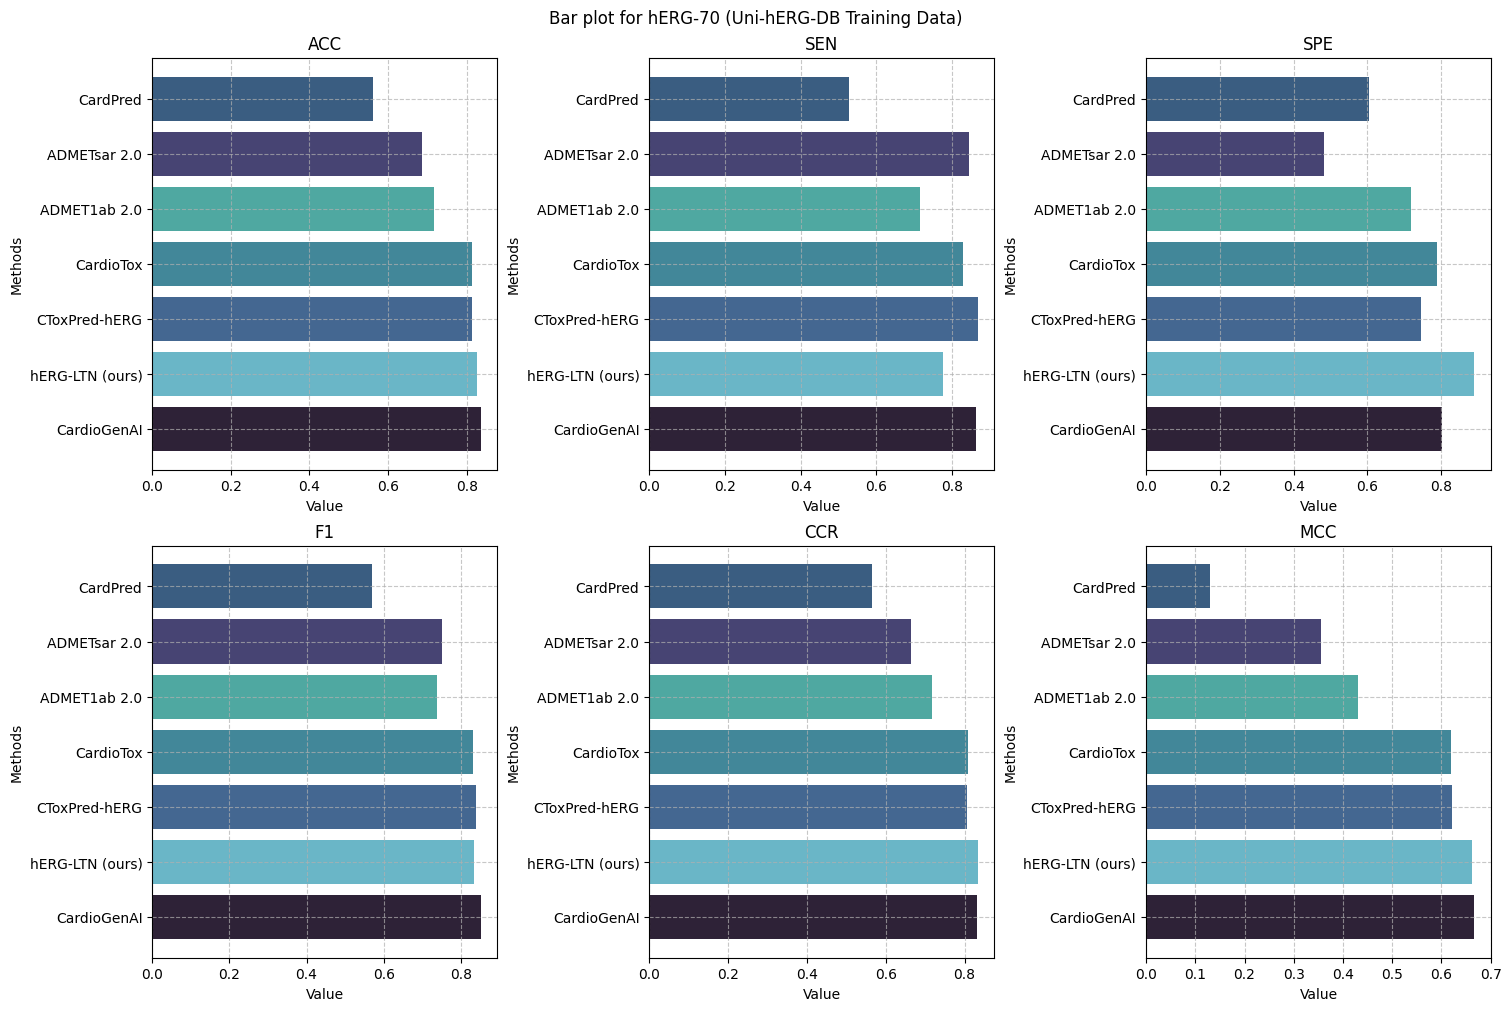

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# New data for each method and metric
data_new = {
    "Methods": ["CardioGenAI", "hERG-LTN (ours)", "CToxPred-hERG", "CardioTox", "ADMET1ab 2.0", "ADMETsar 2.0", "CardPred"],
    "ACC": [0.835, 0.827, 0.814, 0.812, 0.717, 0.685, 0.561],
    "SEN": [0.862, 0.777, 0.867, 0.830, 0.716, 0.845, 0.527],
    "SPE": [0.803, 0.890, 0.746, 0.789, 0.718, 0.483, 0.603],
    "F1": [0.851, 0.833, 0.839, 0.831, 0.738, 0.750, 0.570],
    "CCR": [0.832, 0.833, 0.807, 0.810, 0.717, 0.664, 0.565],
    "MCC": [0.667, 0.662, 0.621, 0.619, 0.431, 0.355, 0.130]
}

# Convert the new data to a DataFrame
df_new = pd.DataFrame(data_new)

# Set 'Methods' as the index
df_new.set_index('Methods', inplace=True)

# Define colors for each method
colors_new = {
    "CardioGenAI": '#2e2237',   # Dark purple
    "hERG-LTN (ours)": "#6ab6c7", #'#95d0b2',    # Slate blue
    "CToxPred-hERG": '#446791', # Steel blue
    "CardioTox": '#428799',     # Dark cyan
    "ADMET1ab 2.0": '#4fa8a1',  # Medium turquoise
    "ADMETsar 2.0": '#474473',  # Light sea green
    "CardPred": '#3a5d81'       # Slightly different blue
}

# Create subplots (2x3 grid)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), constrained_layout=True)

# Define positions for each metric
positions_new = {
    "ACC": (0, 0),
    "SEN": (0, 1),
    "SPE": (0, 2),
    "F1": (1, 0),
    "CCR": (1, 1),
    "MCC": (1, 2)
}

# Plot each metric in its subplot
for metric, pos in positions_new.items():
    ax = axs[pos[0], pos[1]]
    # Use the color dictionary for each method
    bar_colors = [colors_new[method] for method in df_new.index]
    ax.barh(df_new.index, df_new[metric], color=bar_colors)
    ax.set_title(f'{metric}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Methods')
    ax.grid(True, linestyle='--', alpha=0.7)
fig.suptitle("Bar plot for hERG-70 (UnihERG-DB Training Data)")
# Show the plot
plt.show()


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
root_path = '/content/drive/MyDrive/Project/AI and Cardiology/Cardiotoxicity'
!echo "Model Weights names"
!echo {"-"*25}

!ls "{root_path}"/Model-Weights
!echo {"-"*25}
!echo "Dataset names"
!echo {"-"*25}
!ls "{root_path}"/Dataset/External-Data


Model Weights names
-------------------------
hERG-Karim-CDK.keras	     hERG-UniChemDB-CDK.keras	    hERG-UniChemDB-MMB.keras
hERG-Karim-MMB.keras	     hERG-UniChemDB-DeepSeek.keras  hERG-UniChemDB-Morgan_CDK.keras
hERG-Karim-Morgan_CDK.keras  hERG-UniChemDB-gemini.keras    hERG-UniChemDB-Morgan.keras
hERG-Karim-Morgan.keras      hERG-UniChemDB-LLAMA.keras
-------------------------
Dataset names
-------------------------
CDK-external_test_set_pos.csv
CDK-herg60.csv
CDK-herg70.csv
eval_set_herg_60.csv
eval_set_herg_70.csv
external_test_set_pos.csv
h60-uniherg_db-deepseek-qwen1_5b-embedding.parquet
h60-uniherg_db-gemini-embedding.parquet
h70-uniherg_db-deepseek-qwen1_5b-embedding.parquet
h70-uniherg_db-gemini-embedding.parquet
herg_mmb_emb_external_test.npz
herg_mmb_emb_h60.npz
herg_mmb_emb_h70.npz
Morgan-external_test_set_pos.csv
Morgan-herg60.csv
Morgan-herg70.csv
pos-uniherg_db-deepseek-qwen1_5b-embedding.parquet
pos-uniherg_db-gemini-embedding.parquet


In [9]:
def label_th(pic50):
    classes = []
    for x in pic50:
        if x>=5:
            classes.append(1)
        else:
            classes.append(0)

    return np.asarray(classes)

In [10]:
import tensorflow as tf
class MLP(tf.keras.Model):
    """Model that returns logits."""
    def __init__(self, n_classes, hidden_layer_sizes=(16,16,8)):
        super(MLP, self).__init__()
        self.denses = [tf.keras.layers.Dense(s, activation="elu") for s in hidden_layer_sizes]
        self.dense_class = tf.keras.layers.Dense(n_classes)
        self.dropout = tf.keras.layers.Dropout(0.2)

    def call(self, inputs, training=False):
        x = inputs[0]
        for dense in self.denses:
            x = dense(x)
            x = self.dropout(x, training=training)
        return self.dense_class(x)


In [11]:
from sklearn.preprocessing import StandardScaler

In [70]:
!ls "{root_path}/Dataset/UniChemDB-Data"

CDK-unichemdb.csv     herg-gemini-embedding.parquet  Morgan-unichemdb.csv
final-herg.csv	      herg-llama-embedding.parquet   standized-herg.csv
final-herg-split.csv  herg_uniherg_db_mmb_emb.npy    uniherg_db-deepseek-qwen1_5b-embedding.parquet


In [33]:
!ls "{root_path}"/Dataset/External-Data

CDK-external_test_set_pos.csv
CDK-herg60.csv
CDK-herg70.csv
eval_set_herg_60.csv
eval_set_herg_70.csv
external_test_set_pos.csv
h60-uniherg_db-deepseek-qwen1_5b-embedding.parquet
h60-uniherg_db-gemini-embedding.parquet
h60-uniherg_db-llama-embedding.parquet
h70-uniherg_db-deepseek-qwen1_5b-embedding.parquet
h70-uniherg_db-gemini-embedding.parquet
h70-uniherg_db-llama-embedding.parquet
herg_mmb_emb_external_test.npz
herg_mmb_emb_h60.npz
herg_mmb_emb_h70.npz
Morgan-external_test_set_pos.csv
Morgan-herg60.csv
Morgan-herg70.csv
pos-uniherg_db-deepseek-qwen1_5b-embedding.parquet
pos-uniherg_db-gemini-embedding.parquet
pos-uniherg_db-llama-embedding.parquet


In [58]:
from glob import glob

In [136]:
scalars ={
    'MegaMolBART':{
        'train_file':"UniChemDB-Data/herg_uniherg_db_mmb_emb.npy",
        'test_file':[
            "External-Data/herg_mmb_emb_external_test.npz",
            # "External-Data/herg_mmb_emb_h60.npz",
            "External-Data/herg_mmb_emb_h70.npz",
        ],
        'model_weights':"Model-Weights/hERG-UniChemDB-MMB.keras",
    },
    'Gemini':{
        'train_file':"UniChemDB-Data/herg-gemini-embedding.parquet",
        'test_file':[
            "External-Data/pos-uniherg_db-gemini-embedding.parquet",
            # "External-Data/h60-uniherg_db-gemini-embedding.parquet",
            "External-Data/h70-uniherg_db-gemini-embedding.parquet",
        ],
        'model_weights':"Model-Weights/hERG-UniChemDB-gemini.keras",
    },
    'Llama':{
        'train_file':"UniChemDB-Data/herg-llama-embedding.parquet",
        'test_file':[
            "External-Data/pos-uniherg_db-llama-embedding.parquet",
            # "External-Data/h60-uniherg_db-llama-embedding.parquet",
            "External-Data/h70-uniherg_db-llama-embedding.parquet",
        ],
        'model_weights':"Model-Weights/hERG-UniChemDB-LLAMA.keras",
    },
    'DeepSeek':{
        'train_file':"UniChemDB-Data/uniherg_db-deepseek-qwen1_5b-embedding.parquet",
        'test_file':[
            "External-Data/pos-uniherg_db-deepseek-qwen1_5b-embedding.parquet",
            # "External-Data/h60-uniherg_db-deepseek-qwen1_5b-embedding.parquet",
            "External-Data/h70-uniherg_db-deepseek-qwen1_5b-embedding.parquet",
        ],
        'model_weights':"Model-Weights/hERG-UniChemDB-DeepSeek.keras",
    },
    'Morgan':{
        'train_file':'UniChemDB-Data/Morgan-unichemdb.csv',
        'test_file':[
            "External-Data/Morgan-external_test_set_pos.csv",
            'External-Data/Morgan-herg70.csv'
        ],
        'model_weights':"Model-Weights/hERG-UniChemDB-Morgan.keras",
    },
    'CDK':{
        'train_file':'UniChemDB-Data/CDK-unichemdb.csv',
        'test_file':[
            'External-Data/CDK-external_test_set_pos.csv',
            'External-Data/CDK-herg70.csv'
        ],
        'model_weights':"Model-Weights/hERG-UniChemDB-CDK.keras",
    }
}

In [137]:
import os
for i in scalars.keys():
    ss = StandardScaler()
    file_path = str(scalars[i]['train_file'])
    if file_path.endswith('parquet'):
        tmp_df = pd.read_parquet(os.path.join(root_path,"Dataset",file_path))
        ss.fit(np.vstack(tmp_df['Embeddings']))
    elif file_path.endswith('npy'):
        tmp_df = np.load(os.path.join(root_path,"Dataset",file_path),allow_pickle = True)
        ss.fit(tmp_df)
    else:
        print('path issue',i)
    scalars[i]['scalar'] =ss

path issue Morgan
path issue CDK


In [138]:
scalars

{'MegaMolBART': {'train_file': 'UniChemDB-Data/herg_uniherg_db_mmb_emb.npy',
  'test_file': ['External-Data/herg_mmb_emb_external_test.npz',
   'External-Data/herg_mmb_emb_h70.npz'],
  'model_weights': 'Model-Weights/hERG-UniChemDB-MMB.keras',
  'scalar': StandardScaler()},
 'Gemini': {'train_file': 'UniChemDB-Data/herg-gemini-embedding.parquet',
  'test_file': ['External-Data/pos-uniherg_db-gemini-embedding.parquet',
   'External-Data/h70-uniherg_db-gemini-embedding.parquet'],
  'model_weights': 'Model-Weights/hERG-UniChemDB-gemini.keras',
  'scalar': StandardScaler()},
 'Llama': {'train_file': 'UniChemDB-Data/herg-llama-embedding.parquet',
  'test_file': ['External-Data/pos-uniherg_db-llama-embedding.parquet',
   'External-Data/h70-uniherg_db-llama-embedding.parquet'],
  'model_weights': 'Model-Weights/hERG-UniChemDB-LLAMA.keras',
  'scalar': StandardScaler()},
 'DeepSeek': {'train_file': 'UniChemDB-Data/uniherg_db-deepseek-qwen1_5b-embedding.parquet',
  'test_file': ['External-Data/

In [159]:
# for idx, i in enumerate(['Gemini']): ## scalars.keys()
pos_pred = {}
h70_pred = {}

for idx, i in enumerate(scalars.keys()): ## scalars.keys()
    file_path = str(scalars[i]['train_file'])
    if file_path.endswith('parquet'):
        train_data = np.vstack(pd.read_parquet(os.path.join(root_path,"Dataset",file_path))['Embeddings'])[:1]
    elif file_path.endswith('npy'):
        train_data = np.load(os.path.join(root_path,"Dataset",file_path),allow_pickle = True)[:1]
    else:
        train_data = pd.read_csv(os.path.join(root_path,'Dataset',file_path)).drop(['Name'],axis = 1).values[:1]
    tf.keras.backend.clear_session()
    logits_model = MLP(2)
    logits_model([train_data])
    logits_model.load_weights(os.path.join(root_path,scalars[i]['model_weights']))
    for j in scalars[i]['test_file']:
        # print(j)
        if j.endswith('parquet'):
            tst_df = pd.read_parquet(os.path.join(root_path,'Dataset',j))
            x = np.vstack(tst_df['emb'])
            try:
                y = tst_df['ACTIVITY']
            except:
                y = (tst_df.pIC50 >=5).astype(int)

        elif j.endswith('npz'):
            try:
                x = np.vstack(list(map(lambda x:x['emb'],np.load(os.path.join(root_path,'Dataset',j),allow_pickle = True)['external_test_set_pos'])))
                y = pd.read_csv(f'{root_path}/Dataset/External-Data/CDK-external_test_set_pos.csv').rename(columns = {'Name':"target"})['target'].values
            except:
                x = np.vstack(list(map(lambda x:x['emb'],np.load(os.path.join(root_path,'Dataset',j),allow_pickle = True)['herg_mmb_emb_h70'])))
                y = pd.read_csv(f'{root_path}/Dataset/External-Data/CDK-herg70.csv').rename(columns = {'Name':"target"})['target'].values
        else:
            tst_df = pd.read_csv(os.path.join(root_path,'Dataset',j))
            x = tst_df.drop(['Name'],axis = 1)
            y = tst_df['Name'].values
        y_pred = logits_model.predict([x])
        y_pred= tf.nn.softmax(y_pred)
        if y_pred.shape[-1]>1:
            y_pred=y_pred[:,1]
        # np.savez(i+"-UniChemDB",ytrue = y,ypred = y_pred)
        if (j.startswith('External-Data/pos') or j.endswith('external_test.npz') or j.endswith('pos.csv')):
            pos_pred[i] ={'y_true':y,'y_pred':y_pred}
        if (j.startswith('External-Data/h70') or j.endswith('h70.npz') or j.endswith('herg70.csv')):
            h70_pred[i] ={'y_true':y,'y_pred':y_pred}

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [160]:
len(pos_pred)

6

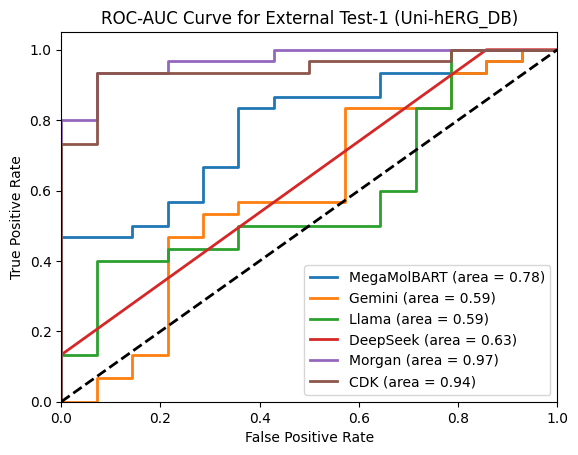

In [167]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc ,matthews_corrcoef as mcc
from sklearn.preprocessing import label_binarize
import numpy as np

# Initialize lists for plotting
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each model
for idx, key in enumerate(scalars.keys()):
    predictions  = pos_pred[key]
    fpr[idx], tpr[idx], _ = roc_curve(predictions['y_true'], predictions['y_pred'])
    roc_auc[idx] = auc(fpr[idx], tpr[idx])
plt.figure()

# Plot ROC curves for each model
for idx, label in enumerate(scalars.keys()):
    plt.plot(fpr[idx], tpr[idx], lw=2, label=f'{label} (area = {roc_auc[idx]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC Curve for External Test-1 (Uni-hERG_DB)")
plt.legend(loc='lower right')
plt.show()


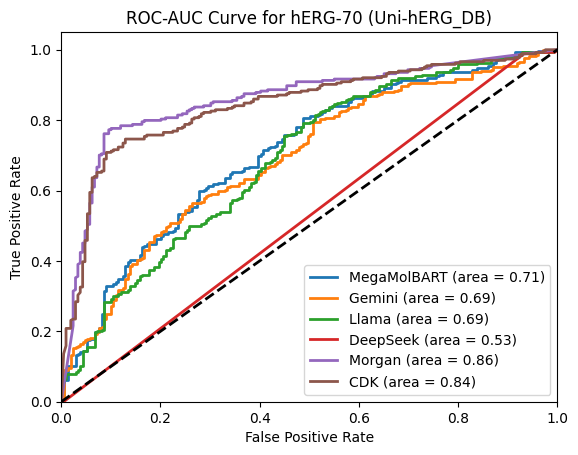

In [168]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc ,matthews_corrcoef as mcc
from sklearn.preprocessing import label_binarize
import numpy as np

# Initialize lists for plotting
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each model
for idx, key in enumerate(scalars.keys()):
    predictions  = h70_pred[key]
    fpr[idx], tpr[idx], _ = roc_curve(predictions['y_true'], predictions['y_pred'])
    roc_auc[idx] = auc(fpr[idx], tpr[idx])
plt.figure()

# Plot ROC curves for each model
for idx, label in enumerate(scalars.keys()):
    plt.plot(fpr[idx], tpr[idx], lw=2, label=f'{label} (area = {roc_auc[idx]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC Curve for hERG-70 (Uni-hERG_DB)")
plt.legend(loc='lower right')
plt.show()
